# 一、数据准备

In [7]:
import pandas as pd
import re
import jieba.posseg as psg
import numpy as np

inputfile='D:\数据分析\文本分析试题.xlsx'
data=pd.read_excel(inputfile,encoding='utf-8')
data.head()

,抓取来源,搜索引擎,用户名,文章链接,发表日期,标题,内容
0,天猫商城,天猫商城,豆***豆,https://detail.tmall.com/item.htm?id=545379144...,2017-07-23 06:42:02,Kiehl's科颜氏金盏花爽肤水250ml 平衡水油 舒缓痘痘,敏感混合偏油，用着很舒服，很快就吸收，一点也不油腻
1,天猫商城,天猫商城,佳***9,https://detail.tmall.com/item.htm?id=546626448...,2017-06-21 21:03:08,【11.19】Kiehl's科颜氏牛油果眼霜14/28g 舒缓眼周,很好 很水润
2,天猫商城,天猫商城,芳***代,https://detail.tmall.com/item.htm?id=545472503...,2017-09-20 08:40:15,Kiehl's科颜氏集焕白均衡亮肤淡斑精华液30ml 淡斑美白提亮,包装不错，物流发的顺丰，第二天到了。第一次用，效果总可以再评价。
3,天猫商城,天猫商城,于***4,https://detail.tmall.com/item.htm?id=546332901...,2017-11-08 09:32:56,Kiehl's科颜氏高保湿清爽洁面乳150ml 清爽洁面,洗完后不紧绷，洗感还不错。
4,天猫商城,天猫商城,h***1,https://detail.tmall.com/item.htm?id=545379144...,2017-08-23 12:21:03,Kiehl's科颜氏金盏花爽肤水250ml 平衡水油 舒缓痘痘,要是能和专卖店同步积分就好了。


In [8]:
data.isnull().any()

抓取来源    False
搜索引擎    False
用户名     False
文章链接    False
发表日期    False
标题      False
内容      False
dtype: bool

In [7]:
#查看每个sku的评论数
data.groupby(['标题']).size()

标题
Kiehl's1号护唇膏15ML 丰盈持久保湿滋润补水淡化细纹原味         14
Kiehl's科颜氏 先试后买试用包 多种功效 包邮 高保湿 金盏花      1414
Kiehl's科颜氏1号护唇膏15ml 滋润防护 唇部打底           1466
Kiehl's科颜氏丰润保湿水凝精华乳50ml 补水保湿缓解干纹         202
Kiehl's科颜氏亚马逊白泥净肤面膜142g 白泥净肤 清洁毛孔       1594
Kiehl's科颜氏亚马逊白泥净致洁面乳150ml 清洁毛孔           360
Kiehl's科颜氏亚马逊白泥净致润肤乳75ml 收敛毛孔细腻肤质        134
Kiehl's科颜氏夜间修护精华液30ml 熬夜党挚爱 修护           145
Kiehl's科颜氏日间赋颜精华液30ml 减少黯沉修护焕亮             2
Kiehl's科颜氏氨基椰香洗发啫喱250/500ml 洁净秀发蓬弹顺滑     335
Kiehl's科颜氏清爽舒润爽肤水250ml 舒缓调理水油            246
Kiehl's科颜氏清爽防晒隔离乳液SPF30+PA+++清爽防晒        216
Kiehl's科颜氏男士保湿乳液 75ML 补水保湿 改善黯沉           48
Kiehl's科颜氏男士活力洁面啫喱250ml 深层清洁 醒肤          230
Kiehl's科颜氏男士活力重现精华乳液75ml 淡化细纹改善肤质        102
Kiehl's科颜氏男士爽肤水250ml控油收敛 醒肤保湿            177
Kiehl's科颜氏积雪草修护乳霜 75ml 敏肌修护舒缓             11
Kiehl's科颜氏积雪草洁面乳 200ml 温和洁净舒缓敏感           16
Kiehl's科颜氏精准清痘精华乳20ml 修护改善痘痘             127
Kiehl's科颜氏维生素C紧肤精华乳液50ml 淡化细纹             75
Kiehl's科颜氏蓝色草本净肤水 250ml 控油保湿滋润           265
Kiehl's科颜氏蓝色草本洁面啫喱250ml 清洁毛孔 平衡水油         64
Kiehl's

In [10]:
l1=len(data)
l1

16143

# 二、数据预处理

# 2.1 文本评论去重

In [11]:
reviews=data[['内容']].drop_duplicates()

In [12]:
content=reviews['内容']

In [13]:
l2=len(content)
print(u'共%s条评论，删除了%s条评论。' %(l1,l1 - l2))

共16143条评论，删除了3150条评论。


In [14]:
content.head()

0           敏感混合偏油，用着很舒服，很快就吸收，一点也不油腻
1                              很好 很水润
2    包装不错，物流发的顺丰，第二天到了。第一次用，效果总可以再评价。
3                       洗完后不紧绷，洗感还不错。
4                     要是能和专卖店同步积分就好了。
Name: 内容, dtype: object

# 2.2 评论分词


In [44]:
import jieba.posseg as psg
worker=lambda s:[(x.word,x.flag) for x in psg.cut(s)]#自定义简单分词函数
seg_word=content.apply(worker)

#将词语转为数据框形式，一列是词，一列是词语所在的句子id，最后一列是词语在该句子中的位置
n_word=seg_word.apply(lambda x:len(x))#每一个评论中词的个数

n_content=[[x+1]*y for x,y in zip(list(seg_word.index),list(n_word))]
index_content=sum(n_content,[])# 将嵌套的列表展开，作为词所在评论的id

seg_word=sum(seg_word,[])
word=[x[0] for x in seg_word]#词

nature = [x[1] for x in seg_word]  # 词性

result=pd.DataFrame({"index_content":index_content,
                    "word":word,
                    "nature":nature})

#删除标点符号
result=result[result['nature']!='x']#x表示标点符号

#删除停用词
stop_path=open("D:/数据分析/stoplist.txt",'r',encoding='utf-8')
stop=stop_path.readlines()#readlines()方法读取整个文件所有行，保存在一个列表(list)变量中，每行作为一个元素，但读取大文件会比较占内存
stop=[x.replace('\n','') for x in stop]
word=list(set(word)-set(stop))#set() 函数创建一个无序不重复元素集，可进行关系测试，删除重复数据，还可以计算交集、差集、并集等。减号表示差集
result = result[result['word'].isin(word)]

# 构造各词在对应评论的位置列
n_word = list(result.groupby(by = ['index_content'])['index_content'].count())
index_word = [list(np.arange(0, y)) for y in n_word]
index_word = sum(index_word, [])  # 表示词语在改评论的位置

# 合并评论id，评论中词的id，词，词性，评论类型
result['index_word'] = index_word


In [45]:
# 提取含有名词类的评论
ind = result[['n' in x for x in result['nature']]]['index_content'].unique()
result = result[[x in ind for x in result['index_content']]]

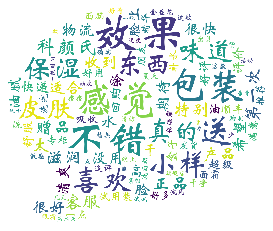

In [46]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

frequencies = result.groupby(by = ['word'])['word'].count()
frequencies = frequencies.sort_values(ascending = False)#sort_values排序，默认升序
backgroud_Image=plt.imread('D:/数据分析/pl.jpg')
wordcloud = WordCloud(font_path="STXINWEI.TTF",
                      max_words=100,
                      background_color='white',
                      mask=backgroud_Image)
my_wordcloud = wordcloud.fit_words(frequencies)
plt.imshow(my_wordcloud)
plt.axis('off') 
plt.show()

In [47]:
# 将结果写出
result.to_csv("D:/数据分析/words.csv", index = False, encoding = 'utf-8')

# 3.构建模型

## 3.1评论数据情感倾向分析

In [52]:
import pandas as pd
import numpy as np
word = pd.read_csv("D:/数据分析/words.csv")

# 读入正面、负面情感评价词
pos_comment = pd.read_csv("D:/数据分析/正面评价词语（中文）.txt", header=None,sep="\n", encoding = 'utf-8', engine='python')
neg_comment = pd.read_csv("D:/数据分析/负面评价词语（中文）.txt", header=None,sep="\n", encoding = 'utf-8', engine='python')
pos_emotion = pd.read_csv("D:/数据分析/正面情感词语（中文）.txt", header=None,sep="\n", encoding = 'utf-8', engine='python')
neg_emotion = pd.read_csv("D:/数据分析/负面情感词语（中文）.txt", header=None,sep="\n", encoding = 'utf-8', engine='python')

# 合并情感词与评价词
positive = set(pos_comment.iloc[:,0])|set(pos_emotion.iloc[:,0])#\表示并集
negative = set(neg_comment.iloc[:,0])|set(neg_emotion.iloc[:,0])
intersection = positive&negative  # 正负面情感词表中相同的词语
positive = list(positive - intersection)
negative = list(negative - intersection)
positive = pd.DataFrame({"word":positive,
                         "weight":[1]*len(positive)})
negative = pd.DataFrame({"word":negative,
                         "weight":[-1]*len(negative)}) 

posneg = positive.append(negative)

#  将分词结果与正负面情感词表合并，定位情感词
data_posneg = posneg.merge(word, left_on = 'word', right_on = 'word', how = 'right')
data_posneg = data_posneg.sort_values(by = ['index_content','index_word'])

## 3.2修正情感倾向

In [53]:
# 根据情感词前时候有否定词或双层否定词对情感值进行修正
# 载入否定词表
notdict = pd.read_csv("D:/数据分析//not.csv")

# 处理否定修饰词
data_posneg['amend_weight'] = data_posneg['weight']  # 构造新列，作为经过否定词修正后的情感值
data_posneg['id'] = np.arange(0, len(data_posneg))
only_inclination = data_posneg.dropna()  # 只保留有情感值的词语
only_inclination.index = np.arange(0, len(only_inclination))
index = only_inclination['id']

for i in np.arange(0, len(only_inclination)):
    review = data_posneg[data_posneg['index_content'] == only_inclination['index_content'][i]]  # 提取第i个情感词所在的评论
    review.index = np.arange(0, len(review))
    affective = only_inclination['index_word'][i]  # 第i个情感值在该文档的位置
    if affective == 1:
        ne = sum([i in notdict['term'] for i in review['word'][affective - 1]])
        if ne == 1:
            data_posneg['amend_weight'][index[i]] = -data_posneg['weight'][index[i]]           
    elif affective > 1:
        ne = sum([i in notdict['term'] for i in review['word'][[affective - 1, affective - 2]]])
        if ne == 1:
            data_posneg['amend_weight'][index[i]] = -data_posneg['weight'][index[i]]
            
# 更新只保留情感值的数据
only_inclination = only_inclination.dropna()

# 计算每条评论的情感值
emotional_value = only_inclination.groupby(['index_content'],as_index=False)['amend_weight'].sum()

# 去除情感值为0的评论
emotional_value = emotional_value[emotional_value['amend_weight'] != 0]

## 3.3查看情感分析效果


In [54]:
# 给情感值大于0的赋予评论类型（content_type）为pos,小于0的为neg
emotional_value['a_type'] = ''
emotional_value['a_type'][emotional_value['amend_weight'] > 0] = 'pos'
emotional_value['a_type'][emotional_value['amend_weight'] < 0] = 'neg'


# 提取正负面评论信息
ind_pos = list(emotional_value[emotional_value['a_type'] == 'pos']['index_content'])
ind_neg = list(emotional_value[emotional_value['a_type'] == 'neg']['index_content'])
posdata = word[[i in ind_pos for i in word['index_content']]]
negdata = word[[i in ind_neg for i in word['index_content']]]

D:\develop\python\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\develop\python\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


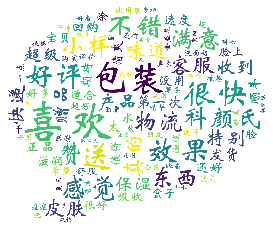

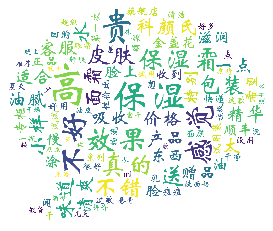

In [55]:
# 绘制词云
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# 正面情感词词云
freq_pos = posdata.groupby(by = ['word'])['word'].count()
freq_pos = freq_pos.sort_values(ascending = False)
backgroud_Image=plt.imread('D:/数据分析/pl.jpg')
wordcloud = WordCloud(font_path="STXINWEI.TTF",
                      max_words=100,
                      background_color='white',
                      mask=backgroud_Image)
pos_wordcloud = wordcloud.fit_words(freq_pos)
plt.imshow(pos_wordcloud)
plt.axis('off') 
plt.show()
# 负面情感词词云
freq_neg = negdata.groupby(by = ['word'])['word'].count()
freq_neg = freq_neg.sort_values(ascending = False)
neg_wordcloud = wordcloud.fit_words(freq_neg)
plt.imshow(neg_wordcloud)
plt.axis('off') 
plt.show()

In [56]:
# 将结果写出,每条评论作为一行
posdata.to_csv("D:/数据分析/pdata.csv", index = False, encoding = 'utf-8')
negdata.to_csv("D:/数据分析/ndata.csv", index = False, encoding = 'utf-8')

## 3.4使用LDA模型进行主题分析


In [57]:
import pandas as pd
import numpy as np
import re
import itertools
import matplotlib.pyplot as plt

# 载入情感分析后的数据
posdata = pd.read_csv("D:/数据分析/pdata.csv", encoding = 'utf-8')
negdata = pd.read_csv("D:/数据分析/ndata.csv", encoding = 'utf-8')

from gensim import corpora, models
# 建立词典
pos_dict = corpora.Dictionary([[i] for i in posdata['word']])  # 正面
neg_dict = corpora.Dictionary([[i] for i in negdata['word']])  # 负面

# 建立语料库
pos_corpus = [pos_dict.doc2bow(j) for j in [[i] for i in posdata['word']]]  # 正面
neg_corpus = [neg_dict.doc2bow(j) for j in [[i] for i in negdata['word']]]   # 负面

unable to import 'smart_open.gcs', disabling that module


In [58]:
# 构造主题数寻优函数
def cos(vector1, vector2):  # 余弦相似度函数
    dot_product = 0.0;  
    normA = 0.0;  
    normB = 0.0;  
    for a,b in zip(vector1, vector2): 
        dot_product += a*b  
        normA += a**2  
        normB += b**2  
    if normA == 0.0 or normB==0.0:  
        return(None)  
    else:  
        return(dot_product / ((normA*normB)**0.5))   

In [59]:
# 主题数寻优
def lda_k(x_corpus, x_dict):  
    
    # 初始化平均余弦相似度
    mean_similarity = []
    mean_similarity.append(1)
    
    # 循环生成主题并计算主题间相似度
    for i in np.arange(2,11):
        lda = models.LdaModel(x_corpus, num_topics = i, id2word = x_dict)  # LDA模型训练
        for j in np.arange(i):
            term = lda.show_topics(num_words = 50)
            
        # 提取各主题词
        top_word = []
        for k in np.arange(i):
            top_word.append([''.join(re.findall('"(.*)"',i)) for i in term[k][1].split('+')])  # 列出所有词
           
        # 构造词频向量
        word = sum(top_word,[])  # 列出所有的词   
        unique_word = set(word)  # 去除重复的词
        
        # 构造主题词列表，行表示主题号，列表示各主题词
        mat = []
        for j in np.arange(i):
            top_w = top_word[j]
            mat.append(tuple([top_w.count(k) for k in unique_word]))  
            
        p = list(itertools.permutations(list(np.arange(i)),2))
        l = len(p)
        top_similarity = [0]
        for w in np.arange(l):
            vector1 = mat[p[w][0]]
            vector2 = mat[p[w][1]]
            top_similarity.append(cos(vector1, vector2))
            
        # 计算平均余弦相似度
        mean_similarity.append(sum(top_similarity)/l)
    return(mean_similarity)

In [60]:
# 计算主题平均余弦相似度
pos_k = lda_k(pos_corpus, pos_dict)
neg_k = lda_k(neg_corpus, neg_dict)   

Text(0.5, 0, '负面评论LDA主题数寻优')

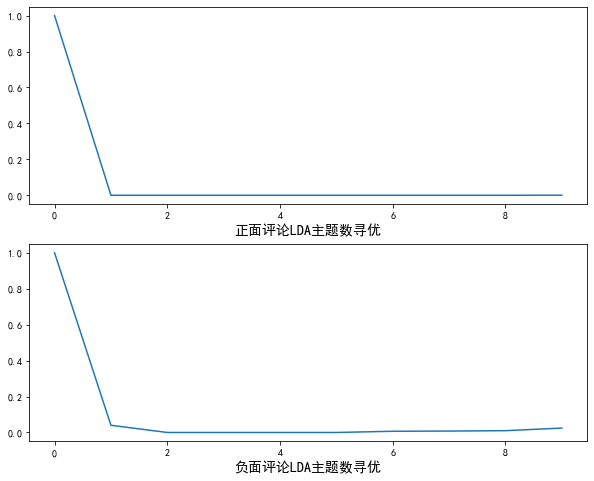

In [61]:
# 绘制主题平均余弦相似度图形
from matplotlib.font_manager import FontProperties  
font = FontProperties(size=14)
#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False  
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
ax1.plot(pos_k)
ax1.set_xlabel('正面评论LDA主题数寻优', fontproperties=font)

ax2 = fig.add_subplot(212)
ax2.plot(neg_k)
ax2.set_xlabel('负面评论LDA主题数寻优', fontproperties=font)

In [62]:
# LDA主题分析
pos_lda = models.LdaModel(pos_corpus, num_topics = 3, id2word = pos_dict)  
pos_theme = pos_lda.show_topics()#展示正面主题
pos_theme

[(0,
  '0.060*"包装" + 0.047*"很快" + 0.039*"感觉" + 0.039*"不错" + 0.031*"满意" + 0.022*"东西" + 0.021*"味道" + 0.019*"真的" + 0.016*"皮肤" + 0.012*"太"'),
 (1,
  '0.100*"喜欢" + 0.036*"好评" + 0.035*"小样" + 0.028*"科颜氏" + 0.024*"赞" + 0.020*"快递" + 0.020*"客服" + 0.017*"赠品" + 0.015*"正品" + 0.013*"超级"'),
 (2,
  '0.051*"送" + 0.047*"效果" + 0.025*"物流" + 0.021*"特别" + 0.018*"收到" + 0.018*"产品" + 0.017*"保湿" + 0.013*"发货" + 0.013*"第一次" + 0.012*"回购"')]

In [63]:
import re
# 匹配中文字符
pattern = re.compile(r'[\u4e00-\u9fa5]+')
# 主题一的特征词
pattern.findall(pos_theme[0][1])

['包装', '很快', '感觉', '不错', '满意', '东西', '味道', '真的', '皮肤', '太']

In [64]:
# 取得正面主题的特征词
pos_key_words=[]
for i in range(3):
    pos_key_words.append(pattern.findall(pos_theme[i][1]))

In [65]:
# 变成 DataFrame 格式
pos_key_words = pd.DataFrame(data=pos_key_words,index=['主题1',"主题2","主题3"])
pos_key_words

,0,1,2,3,4,5,6,7,8,9
主题1,包装,很快,感觉,不错,满意,东西,味道,真的,皮肤,太
主题2,喜欢,好评,小样,科颜氏,赞,快递,客服,赠品,正品,超级
主题3,送,效果,物流,特别,收到,产品,保湿,发货,第一次,回购


In [66]:
neg_lda = models.LdaModel(neg_corpus, num_topics = 3, id2word = neg_dict)
neg_theme = neg_lda.show_topics()#展示负面主题
neg_theme

[(0,
  '0.086*"高" + 0.054*"保湿" + 0.047*"贵" + 0.022*"送" + 0.020*"包装" + 0.014*"价格" + 0.013*"太" + 0.012*"精华" + 0.011*"顺丰" + 0.011*"脸"'),
 (1,
  '0.037*"效果" + 0.034*"保湿霜" + 0.022*"不错" + 0.020*"味道" + 0.019*"皮肤" + 0.018*"水" + 0.018*"小样" + 0.017*"清爽" + 0.014*"油腻" + 0.013*"吸收"'),
 (2,
  '0.038*"感觉" + 0.037*"不好" + 0.027*"真的" + 0.019*"面霜" + 0.016*"科颜氏" + 0.014*"产品" + 0.012*"客服" + 0.009*"希望" + 0.008*"一瓶" + 0.008*"性价比"')]

In [67]:
# 取得负面主题的特征词
neg_key_words=[]
for i in range(3):
    neg_key_words.append(pattern.findall(neg_theme[i][1]))

In [68]:
# 变成 DataFrame 格式
neg_key_words = pd.DataFrame(data=neg_key_words,index=['主题1',"主题2","主题3"])
neg_key_words

,0,1,2,3,4,5,6,7,8,9
主题1,高,保湿,贵,送,包装,价格,太,精华,顺丰,脸
主题2,效果,保湿霜,不错,味道,皮肤,水,小样,清爽,油腻,吸收
主题3,感觉,不好,真的,面霜,科颜氏,产品,客服,希望,一瓶,性价比
